/home/rgautham20/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


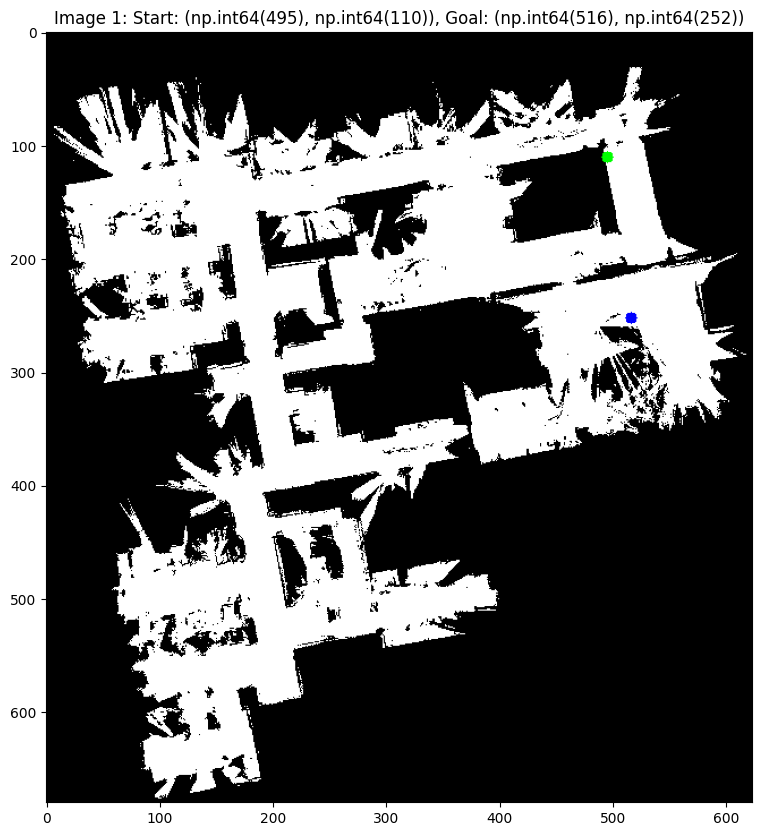

Image 1 - Start Node: (np.int64(495), np.int64(110))
Image 1 - Goal Node: (np.int64(516), np.int64(252))


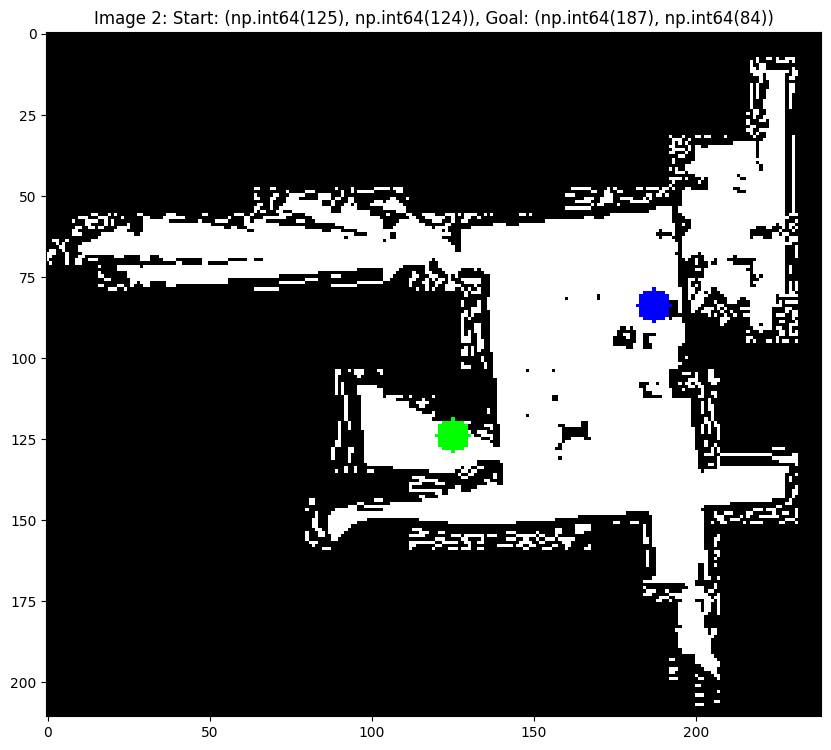

Image 2 - Start Node: (np.int64(125), np.int64(124))
Image 2 - Goal Node: (np.int64(187), np.int64(84))


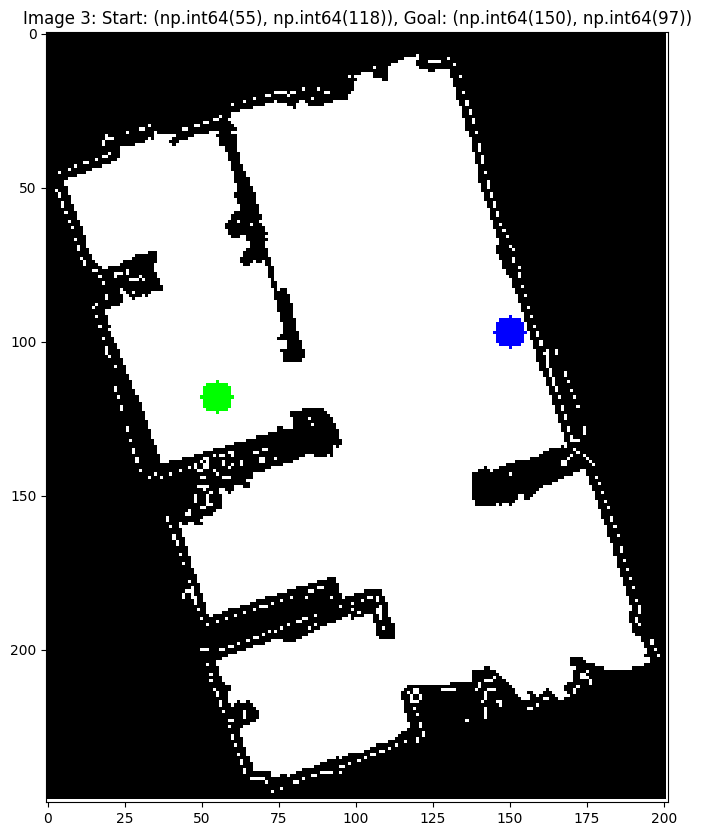

Image 3 - Start Node: (np.int64(55), np.int64(118))
Image 3 - Goal Node: (np.int64(150), np.int64(97))


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def load_image(path):
    """Load and preprocess the occupancy grid map."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return img_binary

def get_free_space_coordinates(img):
    """Return a list of coordinates in free space (white regions)."""
    free_space = np.column_stack(np.where(img == 255))
    return free_space

def get_random_free_node(free_space):
    """Select a random coordinate from the free space."""
    y, x = random.choice(free_space)
    return x, y

def mark_points(img, start, goal):
    """Mark start and goal points on the image for visualization."""
    img_marked = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.circle(img_marked, start, 5, (0, 255, 0), -1)  # Green for start
    cv2.circle(img_marked, goal, 5, (0, 0, 255), -1)   # Red for goal
    return img_marked

# List of image paths
image_paths = [
    "/home/rgautham20/MR/final_project/data1.png",
    "/home/rgautham20/MR/final_project/b_data2.png",
    "/home/rgautham20/MR/final_project/b_data3.png"
]

# Process each image
for idx, image_path in enumerate(image_paths, start=1):
    # Load the occupancy grid map
    img_binary = load_image(image_path)

    # Get free space coordinates
    free_space = get_free_space_coordinates(img_binary)

    # Select random valid start and goal nodes
    start_node = get_random_free_node(free_space)
    goal_node = get_random_free_node(free_space)

    # Visualize the selected nodes on the map
    img_with_points = mark_points(img_binary, start_node, goal_node)

    # Plot the image with marked points
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_points)
    plt.title(f"Image {idx}: Start: {start_node}, Goal: {goal_node}")
    plt.show()

    # Print the start and goal nodes for each image
    print(f"Image {idx} - Start Node: {start_node}")
    print(f"Image {idx} - Goal Node: {goal_node}")
